In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

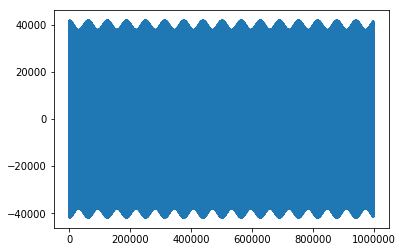

In [202]:
fs = 10e3  # Hz
N = 10e5
t = np.asarray(np.arange(N))/fs

sampling_num = 15000
sampling_rat = 15000

phase0 = 2.5
rpm = 4000 + 200 * np.cos(np.array(t))  # t = (np.asarray(np.linspace(1,45,num=5000)))
amp = rpm / 10

out = 100 * amp * np.cos(2 * np.pi * 1e3 * t  + phase0 + rpm)

plt.plot(out)
plt.show()




In [203]:
2 * np.pi * fs * t

array([0.00000000e+00, 6.28318531e+00, 1.25663706e+01, ...,
       6.28316646e+06, 6.28317274e+06, 6.28317902e+06])

In [204]:
rpm

array([4200.        , 4199.999999  , 4199.999996  , ..., 4172.43338476,
       4172.44351638, 4172.45364628])

In [205]:
amp

array([420.        , 419.9999999 , 419.9999996 , ..., 417.24333848,
       417.24435164, 417.24536463])

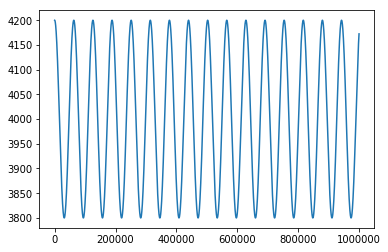

In [206]:
# t = np.asarray(np.arange(5000))
# fs = 500  # Hz

# phase0 = 2.5

# phasec = 2 * np.pi * fs * t

# rpm = 125 * np.cos(np.asarray(phasec))  # t = (np.asarray(np.linspace(1,45,num=5000)))

# amp = rpm / 10

# phase = amp

# out = 100 * amp * np.cos(2 * np.pi * phase * t  + phase0)

# plt.plot(out)
# plt.show()

plt.plot(rpm)
plt.show()

In [207]:
ampm = np.amax(amp)
ampm

420.0

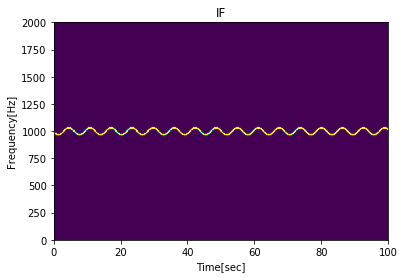

In [210]:
# t = np.asarray(np.arange(5000))
# fs = 500  # Hz

# phase0 = 2.5
# rpm = 1000 + 125 * np.cos(2 * np.pi * fs * (np.asarray(np.linspace(1,36,num=5000))))  # t = (np.asarray(np.linspace(1,45,num=5000)))

# amp = rpm / 10

# phase = phase0 + rpm / 10

# out = amp * np.cos(phase * (np.asarray(np.linspace(1,36,num=5000))))

f, t, Zxx = signal.stft(out, fs, nperseg=2000)
plt.pcolormesh(t, f,  np.abs(Zxx),  vmin=0, vmax=10 * ampm)
plt.title('IF')
plt.ylim(0,2000)
plt.ylabel('Frequency[Hz]')
plt.xlabel('Time[sec]')
plt.show()


In [4]:
out.size

5000

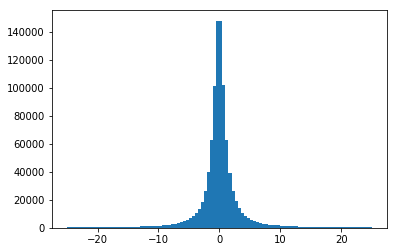

In [5]:
>>> s = np.random.standard_cauchy(1000000)
>>> s = s[(s>-25) & (s<25)]  # truncate distribution so it plots well
>>> plt.hist(s, bins=100)
>>> plt.show()

In [1]:
def test_var_args(f_arg, *argv):
    print("first normal arg:", f_arg)
    for arg in argv:
        print("another arg through *argv:", arg)

test_var_args('yasoob', 'python', 'eggs', 'test')

first normal arg: yasoob
another arg through *argv: python
another arg through *argv: eggs
another arg through *argv: test


In [18]:
class foo:
    def __init__(self,*argv):
        self.arg1 = argv[0]
        self.arg2 = argv[1]
        self.arg3 = argv[2]
    def myFun(self): 
        print("arg1:", self.arg1) 
        print("arg2:", self.arg2) 
        print("arg3:", self.arg3) 
      
# Now we can use *args or **kwargs to 
# pass arguments to this function :  
args = ("Geeks", "for", "Geeks") 
f = foo(*args) 
f.myFun()
# kwargs = {"arg1" : "Geeks", "arg2" : "for", "arg3" : "Geeks"} 
# foo(**kwargs) 

arg1: Geeks
arg2: for
arg3: Geeks


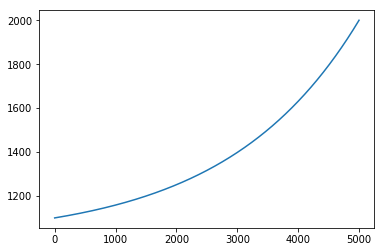

In [29]:
case =  （
plt.plot(case)
plt.show()

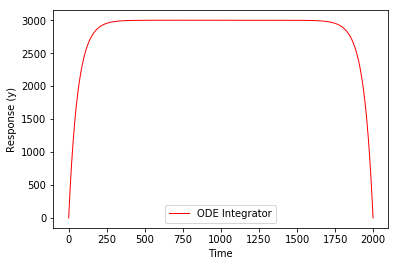

In [29]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate taup * dy/dt = -y + K*u
Kp = 3000.0
taup = 30.0

# # (1) Transfer Function
# num = [Kp]
# den = [taup,1]
# sys1 = signal.TransferFunction(num,den)
# t1,y1 = signal.step(sys1)

# # (2) State Space
# A = -1.0/taup
# B = Kp/taup
# C = 1.0
# D = 0.0
# sys2 = signal.StateSpace(A,B,C,D)
# t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,500,1000)
y3 = odeint(model3,0,t3)
y4 = np.flip(y3)
t4 = np.r_[t3,t3]
y5 = np.r_[y3,y4]
plt.figure(1)
# plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
# plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(y5,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()

In [31]:
t = np.asarray(np.arange(5000))
t

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [33]:
t1 = t[0:t.size//2]
t1

array([   0,    1,    2, ..., 2497, 2498, 2499])

In [38]:
t2 = t[t.size//2:t.size]
t2

array([2500, 2501, 2502, ..., 4997, 4998, 4999])

In [3]:
>>> fs = 10e3
>>> N = 1e5
>>> amp = 2 * np.sqrt(2)
>>> noise_power = 0.01 * fs / 2
>>> time = np.arange(N) / float(fs)
>>> mod = 500*np.cos(2*np.pi*0.25*time)
>>> carrier = amp * np.sin(2*np.pi*3e3*time + mod)
>>> noise = np.random.normal(scale=np.sqrt(noise_power),
...                          size=time.shape)
>>> noise *= np.exp(-time/5)
>>> x = carrier + noise

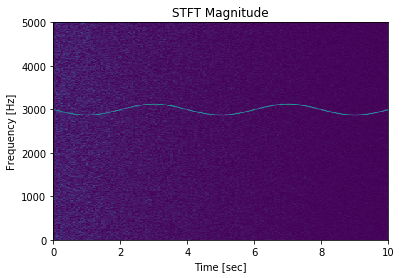

In [4]:
>>> f, t, Zxx = signal.stft(x, fs, nperseg=1000)
>>> plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
>>> plt.title('STFT Magnitude')
>>> plt.ylabel('Frequency [Hz]')
>>> plt.xlabel('Time [sec]')
>>> plt.show()

In [6]:
Z = np.abs(Zxx)
Z.shape

(501, 201)

In [7]:
f.shape

(501,)

In [8]:
t.shape

(201,)